In [2]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)
from importlib import reload

import pandas as pd
import numpy as np
from pymongo import MongoClient
import matplotlib.pyplot as plt
import plot_package as pp
reload(pp)

mongo_url = 'mongodb://10.160.1.15:27017'
db_name = 'IgHashtag'
col_detail = 'detailed_posts'
col_posts = 'posts'

client_posts = MongoClient(mongo_url)[db_name][col_detail]
client_detail= MongoClient(mongo_url)[db_name][col_detail]
cur_posts = client_posts.find({})
cur_detail = client_detail.find({})

In [3]:
df_posts= pd.DataFrame(cur_posts)
df_detail = pd.DataFrame(cur_detail)

# General

In [4]:
print('df_posts')
print(f'{df_posts.describe()}\n')
print(df_posts.info())
print('##########################')
print('df_detail')
print(f'{df_detail.describe()}\n')
print(df_detail.info())

df_posts
       comments_count  followers_count  following_count   likes_count
count    78451.000000     7.845100e+04     78451.000000  78451.000000
mean         3.087418     6.301226e+03       867.916649    128.175205
std         39.489795     3.115038e+04      1594.537449    722.942897
min          0.000000     0.000000e+00         0.000000      0.000000
25%          0.000000     1.580000e+02        56.000000     10.000000
50%          0.000000     5.540000e+02       235.000000     23.000000
75%          1.000000     1.799000e+03       744.000000     54.000000
max       7087.000000     1.395609e+06      7516.000000  57760.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78451 entries, 0 to 78450
Data columns (total 19 columns):
_id                      78451 non-null object
accessibility_caption    3744 non-null object
biography                78451 non-null object
comments                 36 non-null object
comments_count           78451 non-null int64
commetns             

# POSTS

In [14]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

Text(0.5, 1.0, 'Followers count distribution')

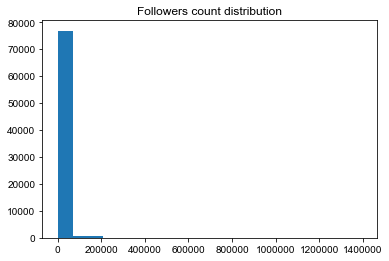

In [77]:
plt.hist(df_posts.sort_values('followers_count')['followers_count'],bins=20)
# plt.ylim([0,100])
plt.title('Followers count distribution')

Text(0.5, 1.0, 'Comments count distribution')

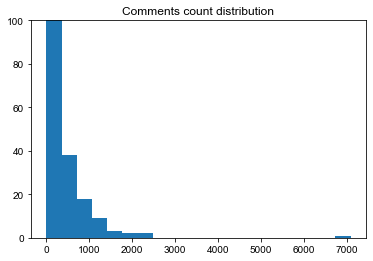

In [79]:
plt.hist(df_posts.sort_values('comments_count')['comments_count'],bins=20)
plt.ylim([0,100])
plt.title('Comments count distribution')

Text(0, 0.5, 'Count')

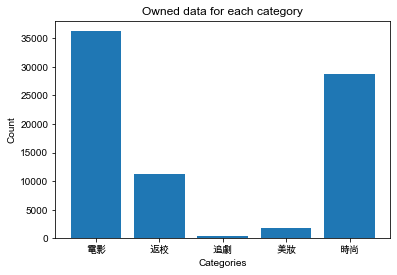

In [75]:
value = df_posts.groupby('hashtag').count()['_id']
plt.bar(df_posts['hashtag'].unique(),value)
plt.title('Owned data for each category')
plt.xlabel('Categories')
plt.ylabel('Count')
# plt.ylim([0,1000])

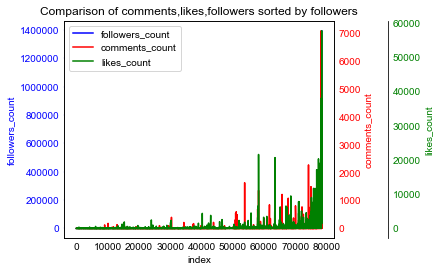

In [47]:
value =df_posts[['comments_count','likes_count','followers_count']].sort_values('followers_count').reset_index(drop=True)
x_ticks = value.index
pp.plot_multi(x_ticks,value['comments_count'],
              x_ticks,value['likes_count'],
              x_ticks,value['followers_count'],
              'index',
              'comments_count','likes_count','followers_count',
              'Comparison of comments,likes,followers sorted by followers'
              
             )

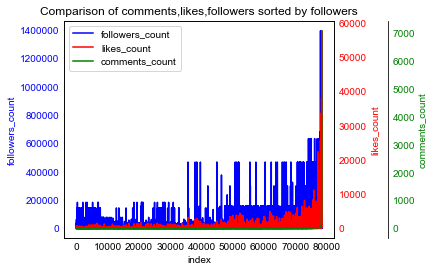

In [48]:
value =df_posts[['comments_count','likes_count','followers_count']].sort_values('comments_count').reset_index(drop=True)
x_ticks = value.index
pp.plot_multi(x_ticks,value['followers_count'],
              x_ticks,value['likes_count'],
              x_ticks,value['comments_count'],
              'index',
              'followers_count','likes_count','comments_count',
              'Comparison of comments,likes,followers sorted by followers'
              
             )

In [61]:
df_posts[df_posts['followers_count']>500000]

,_id,accessibility_caption,biography,comments,comments_count,commetns,followers_count,following_count,hashtag,is_ad,is_video,likes_count,location,picture_url,post_content,post_link,post_time,sidecar_images,username
387,5d49025677f584ff6d041c83,NaN,所有網路當紅話題的大平台！👍\n透過大量社群曝光讓熱門內容被全世界看到\nFB🔎台灣達人秀 ...,NaN,20,"[{'comment_id': '18021152638203231', 'created_...",631591,142,電影,False,True,3148,None,https://scontent-nrt1-1.cdninstagram.com/vp/09...,天阿！〈Memory〉這首歌太經典了💥\n完整版看這 @ttshow.news\n#電影 #...,https://instagram.com/p/B0TLlfCBrir,2019-07-24 20:36:15,NaN,ttshow.tw
652,5d49038977f584ff6d04493d,NaN,Hong Kong Actor \n工作接洽：Syllina Tong (852-90297...,NaN,156,"[{'created_time': '2019-07-26 12:15:16', 'owne...",683564,865,電影,False,True,11550,None,https://scontent-nrt1-1.cdninstagram.com/vp/79...,要飾演一名西洋拳拳手，學跳繩係必需嘅...\n.\n 第一堂跳繩，我跳得幾有少女嘅味道🤣🤦🏻...,https://instagram.com/p/B0WNRNTBGRB,2019-07-26 00:48:12,NaN,louischeung2013
2292,5d49088b77f584ff6d04ef95,NaN,所有網路當紅話題的大平台！👍\n透過大量社群曝光讓熱門內容被全世界看到\nFB🔎台灣達人秀 ...,NaN,143,"[{'created_time': '2019-07-08 14:49:57', 'owne...",631600,142,電影,False,True,8365,None,https://scontent-nrt1-1.cdninstagram.com/vp/29...,花木蘭真人版來了🔥講英文捏😍 \n完整版看這 @ttshow.news\n#花木蘭 #真人版...,https://instagram.com/p/Bzo4UsdBW7r,2019-07-08 10:19:36,NaN,ttshow.tw
4976,5d4911fd77f584ff6d06082f,NaN,所有網路當紅話題的大平台！👍\n透過大量社群曝光讓熱門內容被全世界看到\nFB🔎台灣達人秀 ...,NaN,70,"[{'comment': '@andrewkuox 是你對ㄅ', 'owner_id': '...",631609,142,電影,False,False,5550,None,https://scontent-nrt1-1.cdninstagram.com/vp/c0...,真的母湯捏😡鍵盤怪人😤 #該編 \n影片： @bonibaobao 👈提供授權\n#電影 #...,https://instagram.com/p/BzAaCdxhE4P,2019-06-22 17:04:52,"[{'id': '2071769909599430160', 'display_url': ...",ttshow.tw
11606,5d49282d77f584ff6d08b3b9,NaN,所有網路當紅話題的大平台！👍\n透過大量社群曝光讓熱門內容被全世界看到\nFB🔎台灣達人秀 ...,NaN,620,"[{'likes_count': 0, 'owner': 'cw_1256', 'comme...",631344,142,電影,False,True,16632,None,https://scontent-nrt1-1.cdninstagram.com/vp/cf...,光洙真的每次都會讓人充滿驚喜感欸👏💯\n完整版看这 @ttshow.news\n#電影 #預...,https://instagram.com/p/BxE60T8lcXx,2019-05-05 18:05:55,NaN,ttshow.tw
12484,5d492b4077f584ff6d08febc,NaN,所有網路當紅話題的大平台！👍\n透過大量社群曝光讓熱門內容被全世界看到\nFB🔎台灣達人秀 ...,NaN,891,"[{'owner': 'ccy_925', 'created_time': '2019-05...",631354,142,電影,False,True,7660,None,https://scontent-nrt1-1.cdninstagram.com/vp/be...,嚇死‼️小丑回來了【牠 第二章】預告 \n完整版看这 @ttshow.news\n#牠 #第...,https://instagram.com/p/BxRAR1mF9yk,2019-05-10 10:45:18,NaN,ttshow.tw
13268,5d492dd477f584ff6d0959d8,NaN,所有網路當紅話題的大平台！👍\n透過大量社群曝光讓熱門內容被全世界看到\nFB🔎台灣達人秀 ...,NaN,8,"[{'likes_count': 0, 'owner': 'yilika9408', 'co...",631349,142,電影,False,True,2461,None,https://scontent-nrt1-1.cdninstagram.com/vp/86...,天阿！年輕的時候看起來好嫩想咬一口🤤 \n完整版看这 @ttshow.news\n#電影 #...,https://instagram.com/p/BwrpOSXl6T8,2019-04-25 22:31:06,NaN,ttshow.tw
15761,5d49361a77f584ff6d0a5a2f,NaN,所有網路當紅話題的大平台！👍\n透過大量社群曝光讓熱門內容被全世界看到\nFB🔎台灣達人秀 ...,NaN,136,[{'comment': '@fang_1544321 @sosogirl0408 @fab...,631351,142,電影,False,True,4476,None,https://scontent-nrt1-1.cdninstagram.com/vp/60...,POKÉMON電影試鏡畫面曝光！太可愛啦😍 \n完整版看这 @ttshow.news\n#名...,https://instagram.com/p/BwT88TFFDTO,2019-04-16 17:41:53,NaN,ttshow.tw
15817,5d49364e77f584ff6d0a5e83,NaN,所有網路當紅話題的大平台！👍\n透過大量社群曝光讓熱門內容被全世界看到\nFB🔎台灣達人秀 ...,NaN,54,"[{'owner': 'bo.123zz', 'created_time': '2019-0...",631358,142,電影,False,True,2460,None,https://scontent-nrt1-1.cdninstagram.com/vp/69...,國外網友說像阿湯哥！認真！？🤷🏿‍♀ 完整版看这 @ttshow.news\n#電影 #預告...,https://instagram.com/p/Bwbje8IFFD0,2019-04-19 16:33:09,NaN,ttshow.tw
16065,5d49373777f584ff6d0a8076,NaN,所有網路當紅話題的大平台！👍\n透過大量社群曝光讓熱門內容被全世界看到\nFB🔎台灣達人秀 ...,NaN,181,"[{'owner': 'ooobbb_0516', 'owner_id': '1738328...",631357,142,電影,False,True,2830,None,https://scontent-nrt1-1.cdninstagram.com/vp/84...,農曆七月上映想要逼死誰嗚嗚嗚\n完整版看这 @ttshow.news\n#電影 #預告 #恐...,https://instagram.com/p/BwCZ-UHF1fQ,2019-04-09 22:09:10,NaN,ttshow.tw
